In [1]:
## Variable Definitions:
# CustID – An integer identifier for each customer (1 to 300).
# Age – The customer’s age in years.
# Gender – The customer’s gender identification: Male, Female, Other, or DNA (did not answer)
# L-Tier – The customer’s loyalty tier: 1 (Silver), 2 (Gold), 3 (Platinum)
# CLT_Mo – The customer’s lifetime in number of months.
# AtmSat – The customer’s satisfaction rating regarding the atmosphere of the store (1 to 7).
# ProdSat – The customer’s satisfaction rating regarding the products offered in the store (1 to 7).
# ServSat – The customer’s satisfaction rating regarding the service available in the store (1 to 7).
# Spend – The aggregate value of all this customer’s purchases in US dollars.

Step 1: Load the libraries you are going to need.
Step 2: Read in the StoreData.csv file into a Table.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("../data/StoreData.csv")
df.head()

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend
0,1,56,Other,1,102,4,4,1,2804
1,2,52,Male,3,113,5,5,4,2974
2,3,32,Male,1,1,3,3,1,2038
3,4,35,Male,3,63,3,3,2,2297
4,5,37,Male,1,113,3,3,1,2384


In [3]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

Step 3: Get some basic info about the variables.

In [4]:
df.shape

(300, 9)

In [5]:
df.dtypes

# this shows that Gender is an object not a string

CustID      int64
Age         int64
Gender     object
L_Tier      int64
CLT_Mo      int64
AtmSat      int64
ProdSat     int64
ServSat     int64
Spend       int64
dtype: object

In [6]:
df[["CustID", "Age", "L_Tier", "CLT_Mo", "AtmSat", "ProdSat", "ServSat", "Spend"]].describe()

,CustID,Age,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,150.500000,50.323333,2.006667,61.673333,4.046667,4.070000,3.883333,2164.73000
std,86.746758,18.849664,0.830011,36.000278,1.555384,1.494169,2.055189,688.69711
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,509.00000
25%,75.750000,35.000000,1.000000,30.750000,3.000000,3.000000,2.000000,1678.00000
50%,150.500000,51.000000,2.000000,63.000000,4.000000,4.000000,4.000000,2364.50000
75%,225.250000,67.000000,3.000000,94.000000,5.000000,5.000000,6.000000,2768.25000
max,300.000000,84.000000,3.000000,120.000000,7.000000,7.000000,7.000000,3035.00000


In [7]:
gender_table = df['Gender'].value_counts()
print(gender_table)

Gender
Male      141
Female    137
Other      16
DNA         6
Name: count, dtype: int64


In [8]:
# Make a female variable

df['Female'] = np.where(df['Gender'] == 'Female', 1, 0)

female_frequency = df['Female'].value_counts()

print(female_frequency)

Female
0    163
1    137
Name: count, dtype: int64


In [9]:
df.head(10)

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend,Female
0,1,56,Other,1,102,4,4,1,2804,0
1,2,52,Male,3,113,5,5,4,2974,0
2,3,32,Male,1,1,3,3,1,2038,0
3,4,35,Male,3,63,3,3,2,2297,0
4,5,37,Male,1,113,3,3,1,2384,0
5,6,75,Female,2,1,3,4,4,1688,1
6,7,80,Male,3,51,5,5,3,1285,0
7,8,76,Male,1,114,5,5,2,1686,0
8,9,72,Male,1,73,5,6,3,2108,0
9,10,58,Male,3,71,5,5,3,2872,0


Step 4: Visualize your data.

<Figure size 1200x800 with 0 Axes>

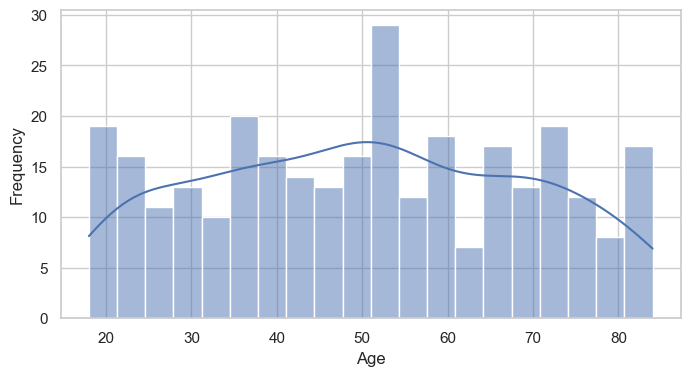

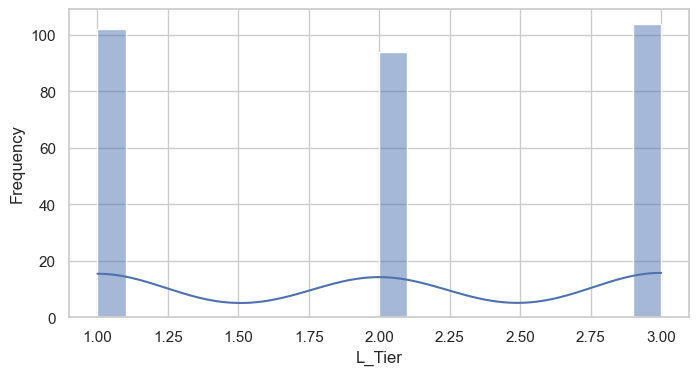

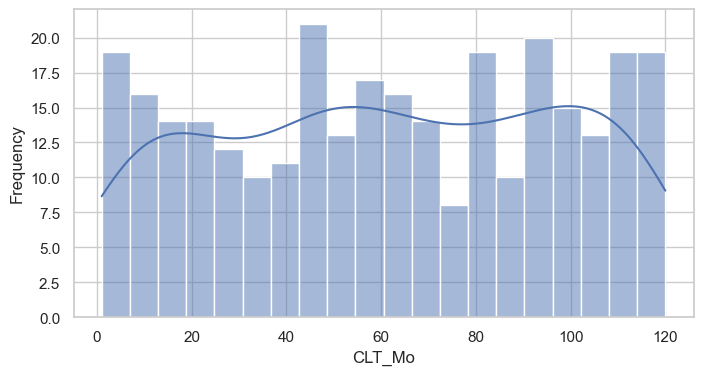

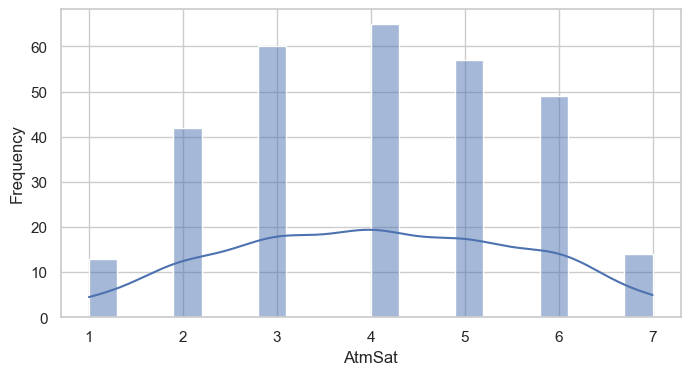

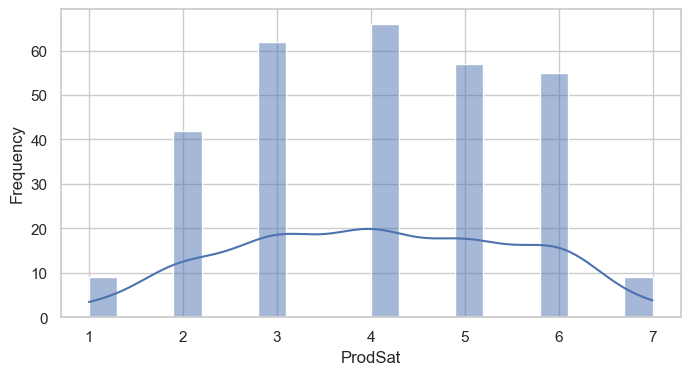

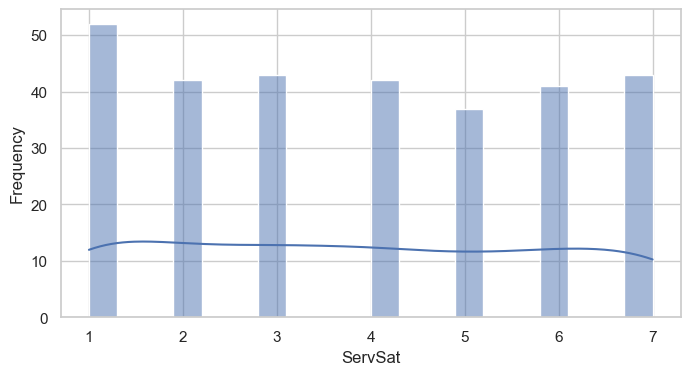

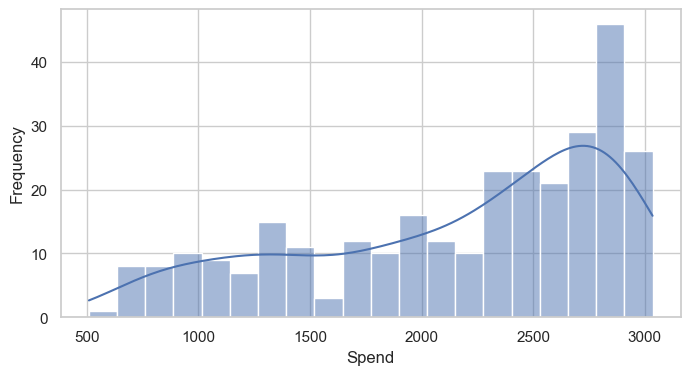

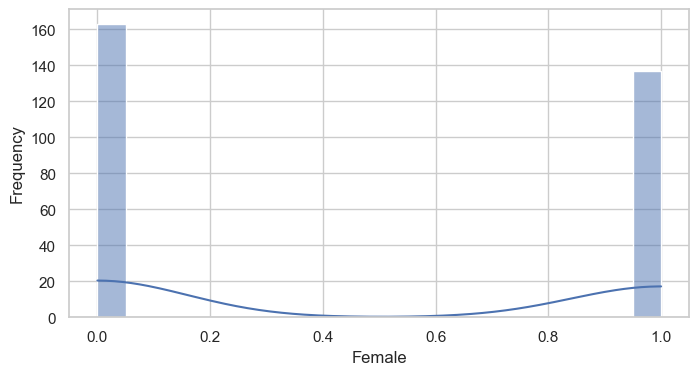

In [10]:
continuous_columns = df.drop(['CustID', 'Gender'], axis=1)

# Replace infinite values with NaN
continuous_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
continuous_columns.dropna(inplace=True)

# Use seaborn's histplot for better visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot histograms for each continuous variable
for column in continuous_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(continuous_columns[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Step 5: Perform a one-sample t-test.

In [11]:
from scipy.stats import ttest_1samp

# Assuming 'ServSat' is the column you want to test
# Replace 'your_column_name' with the actual column name in your dataset.
column_name = 'ServSat'

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(df[column_name], popmean=4)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -0.9832312286338039
P-value: 0.3262885753507444


Step 6: Do a paired-sample t-test.

In [12]:
from scipy.stats import ttest_1samp

ServSat = 'ServSat'

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(df[ServSat], popmean=4)

# Print the results
print(f"One Sample t-test")
print(f"data: {ServSat}")
print(f"t = {t_stat:.2f}, df = {len(df[ServSat]) - 1}, p-value = {p_value:.3f}")
print("alternative hypothesis: true mean is not equal to 4")

# Calculate and print the 95 percent confidence interval
confidence_interval = (df[ServSat].mean() - 1.96 * df[ServSat].std(), df[ServSat].mean() + 1.96 * df[ServSat].std())
print(f"95 percent confidence interval: {confidence_interval[0]:.3f} {confidence_interval[1]:.3f}")

# Print the sample estimate
print(f"sample estimates:")
print(f"mean of {ServSat}")
print(f"{df[ServSat].mean():.3f}")

One Sample t-test
data: ServSat
t = -0.98, df = 299, p-value = 0.326
alternative hypothesis: true mean is not equal to 4
95 percent confidence interval: -0.145 7.912
sample estimates:
mean of ServSat
3.883


We should accept the null hypothesis that ServSat is not significantly different from 4. It also gives us a 95% CI that includes 4.

Step 7: Perform a chi-squared test of association.

In [13]:
Gender = 'Gender'
L_Tier = 'L_Tier'

# Create a cross-table
contingency_table = pd.crosstab(df[Gender], df[L_Tier], margins=True, margins_name="Total")
print(contingency_table)

L_Tier    1   2    3  Total
Gender                     
DNA       0   3    3      6
Female   45  41   51    137
Male     48  45   48    141
Other     9   5    2     16
Total   102  94  104    300


In [14]:
# Dropping the rightmost 'Total' column and the bottom total row
contingency_table2 = contingency_table.drop("Total", axis=1).iloc[:-1]

print(contingency_table2)


L_Tier   1   2   3
Gender            
DNA      0   3   3
Female  45  41  51
Male    48  45  48
Other    9   5   2


In [15]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2, correction=False)
print("Pearson's Chi-squared test")
print(f"X-squared = {chi2_stat:.1f}, df = {dof}, p-value = {p_value:.3f}")

Pearson's Chi-squared test
X-squared = 8.1, df = 6, p-value = 0.228


This results in a non-significant association (p=.23).

In [16]:
df.head()

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend,Female
0,1,56,Other,1,102,4,4,1,2804,0
1,2,52,Male,3,113,5,5,4,2974,0
2,3,32,Male,1,1,3,3,1,2038,0
3,4,35,Male,3,63,3,3,2,2297,0
4,5,37,Male,1,113,3,3,1,2384,0


In [17]:
# Remaking the female variable
# I had to drop earlier, but I need to put it back
df['Female'] = np.where(df['Gender'] == 'Female', 1, 0)
df.head()

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend,Female
0,1,56,Other,1,102,4,4,1,2804,0
1,2,52,Male,3,113,5,5,4,2974,0
2,3,32,Male,1,1,3,3,1,2038,0
3,4,35,Male,3,63,3,3,2,2297,0
4,5,37,Male,1,113,3,3,1,2384,0


In [18]:
# Test again using Female by L_Tier

Female = 'Female'
L_Tier = 'L_Tier'

# Create a cross-table
contingency_table2 = pd.crosstab(df[Female], df[L_Tier], margins=True, margins_name="Total")
print(contingency_table2)

L_Tier    1   2    3  Total
Female                     
0        57  53   53    163
1        45  41   51    137
Total   102  94  104    300


In [19]:
Female = 'Female'
L_Tier = 'L_Tier'

# Create a contingency table
contingency_table = pd.crosstab(df[Female], df[L_Tier])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table, correction=False)

# Print the results
print("Pearson's Chi-squared test")
print(f"X-squared = {chi2_stat:.2f}, df = {dof}, p-value = {p_value:.3f}")


Pearson's Chi-squared test
X-squared = 0.73, df = 2, p-value = 0.693


This result is non-signif., giving us confidence that there is no assoc. b/t Gender and LT (this is when the p < x-squared)

Step 8: Model our data with linear regression.
- I want predict the amount that a customer will spend based on their customer characteristics. I will do this using OLS linear regression. I will start by modeling Spend as a simple additive function of the other variables excluding CustID, and using the full-information Gender variable. However, I will treat gender and Loyalty Tier as categorical (create a new variable for each as a factor) and set “Female” and the lowest tier (1) as the reference levels.

In [20]:
df.head()

# this is showing that it isn't changing the column into a factor
# this would change the categorical (str) output to 0s and 1s

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend,Female
0,1,56,Other,1,102,4,4,1,2804,0
1,2,52,Male,3,113,5,5,4,2974,0
2,3,32,Male,1,1,3,3,1,2038,0
3,4,35,Male,3,63,3,3,2,2297,0
4,5,37,Male,1,113,3,3,1,2384,0


In [21]:
# https://pbpython.com/categorical-encoding.html

df["Gender"] = df["Gender"].astype('category')
df["L_Tier"] = df["L_Tier"].astype('category')
df.dtypes

CustID        int64
Age           int64
Gender     category
L_Tier     category
CLT_Mo        int64
AtmSat        int64
ProdSat       int64
ServSat       int64
Spend         int64
Female        int64
dtype: object

In [22]:
df["F_Gender"] = df["Gender"].cat.codes
df["F_Tier"] = df["L_Tier"].cat.codes
df.head()

,CustID,Age,Gender,L_Tier,CLT_Mo,AtmSat,ProdSat,ServSat,Spend,Female,F_Gender,F_Tier
0,1,56,Other,1,102,4,4,1,2804,0,3,0
1,2,52,Male,3,113,5,5,4,2974,0,2,2
2,3,32,Male,1,1,3,3,1,2038,0,2,0
3,4,35,Male,3,63,3,3,2,2297,0,2,2
4,5,37,Male,1,113,3,3,1,2384,0,2,0


In [23]:
import statsmodels.api as sm

df_py = df

# Fit linear regression model
X = sm.add_constant(df_py[['Age', 'F_Gender', 'F_Tier', 'CLT_Mo', 'AtmSat', 'ProdSat', 'ServSat']])
y = df_py['Spend']

model = sm.OLS(y, X).fit()
print(model.summary())

# R does this computation better as Python does not factor the variables
# the probability found in R was 0.16

                            OLS Regression Results                            
Dep. Variable:                  Spend   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.762
Date:                Mon, 22 Jan 2024   Prob (F-statistic):             0.0947
Time:                        18:29:02   Log-Likelihood:                -2379.4
No. Observations:                 300   AIC:                             4775.
Df Residuals:                     292   BIC:                             4804.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1537.9079    225.108      6.832      0.0